# Projekt 2 - WAIF II

Wykorzystuję wzory:

$$q = \frac{e^{-rt} \cdot S_{0} - S_{1}(\searrow)}{S_{1}(\nearrow) - S_{1}(\searrow)}$$

oraz

$$V_{0} = e^{-rt} (q \cdot V_{1}(\nearrow) + (1-q) \cdot V_{1}(\searrow))$$

gdzie:

$$
\begin{cases}
S_{1}(\nearrow) = S_{0} e^{\sigma \Delta t}\\
S_{1}(\searrow) = S_{0} e^{-\sigma \Delta t}
\end{cases}
$$

gdzie przy $N$ będącym liczbą kroków:

$$
t = \Delta t = \frac{1}{N}
$$

### a)

### Wypisywanie

In [1]:
import numpy as np

precision = 3
width = 4 + precision
list_to_str = lambda l: '\n'.join([' '.join(map(lambda x: '{:{width}.{prec}f}'.format(x, width=width, prec=precision), k)) for k in l])
    

def log(s):
    print(s)

### Wyliczanie parametrów

In [2]:
class Args:
    def __init__(self, S0, E, steps, r, s):
        self.S0 = S0
        self.E = E
        self.steps = steps
        self.r = r
        self.s = s

        self.t = 1.0 / steps
        self.u = np.e**(s*self.t)
        self.d = np.e**(-s*self.t)
        self.q = (S0 * np.e ** (-r * self.t) - S0 * self.d) / (S0 * self.u - S0 * self.d)

### Wyliczanie wartości akcji w kolejnych chwilach

In [3]:
def get_Ss(args):    
    S = [[0] * (i + 1) for i in range(args.steps+1)]
    S[0][0] = args.S0

    for i in range(args.steps):
        for j in range(i+1):
            S[i+1][j] = S[i][j] * args.d
            S[i+1][j+1] = S[i][j] * args.u
    
    log(list_to_str(S))
    return S

### Wyliczanie wartości opcji w kolejnych chwilach

In [4]:
def get_Vs(S, args):
    V = [[0] * (i + 1) for i in range(args.steps+1)]
    for j in range(args.steps):
        V[args.steps][j] = max(0.0, args.E - S[args.steps][j])

    for i in range(args.steps-1, -1, -1):
        for j in range(i+1):
            V[i][j] = np.e ** (-args.r * args.t) * (args.q * V[i+1][j+1] + (1.0 - args.q) * V[i+1][j])

    log(list_to_str(V))
    return V

### Wyliczanie wartości opcji w chwili 0

In [5]:
def get_V0(S0, steps, E, r, s):
    args = Args(S0, E, steps, r, s)
    Vs = get_Vs(get_Ss(args), args)
    return Vs[0][0]

### Rysowanie wykresu

In [34]:
import functools
import matplotlib.pyplot as plt


s = 0.2
Smin, Smax = 80, 120
r = 0.1
T = 1
E = 100
S0 = 100
max_steps = 100

get_f_n = lambda n: functools.partial(get_V0, steps=n, E=E, r=r, s=s)

format_str = '{:3.5f}'

xs = np.arange(Smin, Smax, 0.1)

N = 10
steps = max_steps // N


plt.figure(figsize=(20,10))
for i in range(N):
    n = (i+1) * steps
    f_n = get_f_n(n)
    ys = np.array(list(map(f_n, xs)))
    plt.plot(xs, ys, label=f'{n} kroków')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()

KeyboardInterrupt: 

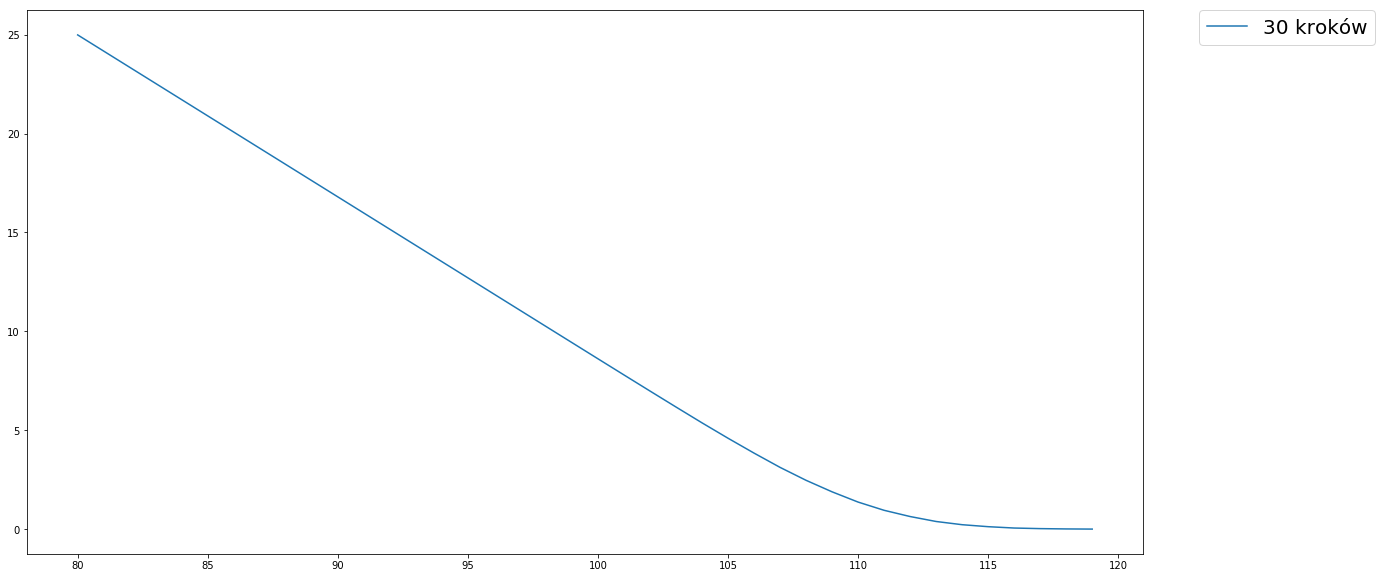

In [33]:
N = 30

log = lambda x: None
plt.figure(figsize=(20,10))
f_n = get_f_n(N)
ys = np.array(list(map(f_n, xs)))
plt.plot(xs, ys, label=f'{N} kroków')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()

In [9]:
N = 10

log = lambda x: print(x)
f_n = get_f_n(N)

f_n(90)

 90.000
 88.218  91.818
 86.471  90.000  93.673
 84.759  88.218  91.818  95.565
 83.080  86.471  90.000  93.673  97.496
 81.435  84.759  88.218  91.818  95.565  99.465
 79.823  83.080  86.471  90.000  93.673  97.496 101.475
 78.242  81.435  84.759  88.218  91.818  95.565  99.465 103.525
 76.693  79.823  83.080  86.471  90.000  93.673  97.496 101.475 105.616
 75.174  78.242  81.435  84.759  88.218  91.818  95.565  99.465 103.525 107.750
 73.686  76.693  79.823  83.080  86.471  90.000  93.673  97.496 101.475 105.616 109.926
 16.799
 17.707  14.702
 18.626  15.619  12.495
 19.554  16.547  13.418  10.180
 20.491  17.484  14.354  11.103   7.773
 21.437  18.430  15.300  12.044   8.676   5.325
 22.393  19.386  16.256  12.998   9.613   6.163   2.977
 23.359  20.352  17.222  13.964  10.574   7.066   3.649   1.041
 24.334  21.327  18.197  14.939  11.549   8.020   4.435   1.394   0.000
 25.319  22.312  19.182  15.925  12.534   9.005   5.332   1.869   0.000   0.000
 26.314  23.307  20.177  16.920 

16.798570424534095

[-0.8190583108865844, -0.8190583108864392, -0.8190583108864208, -0.8190583108865485, -0.8190583108864089, -0.8190583108863393, -0.8190583108864777, -0.81905831088646, -0.8190583108863277, -0.8190583108864118, -0.8190583108864447, -0.8190583108862681, -0.8190583108863501, -0.8190583108863587, -0.8190583108864852, -0.8190583108863858, -0.8190583108865094, -0.8190583108864702, -0.8190583108863514, -0.8190583108864491, -0.8190583108865005, -0.8190583108864179, -0.8190583108862933, -0.8190583108864202, -0.8190583108863845, -0.819058310765461, -0.8190582121852431, -0.8190350605924173, -0.817461057514592, -0.7853927418206306, -0.589382422744155, -0.22828178190687834, -0.031480641743518334, -0.0012189178037607107, -1.1274651959307042e-05, -2.1613309287818638e-08, -7.207546979503926e-12, -3.1870508743738363e-16, -1.4479748578331935e-21, -4.712138636812679e-28]


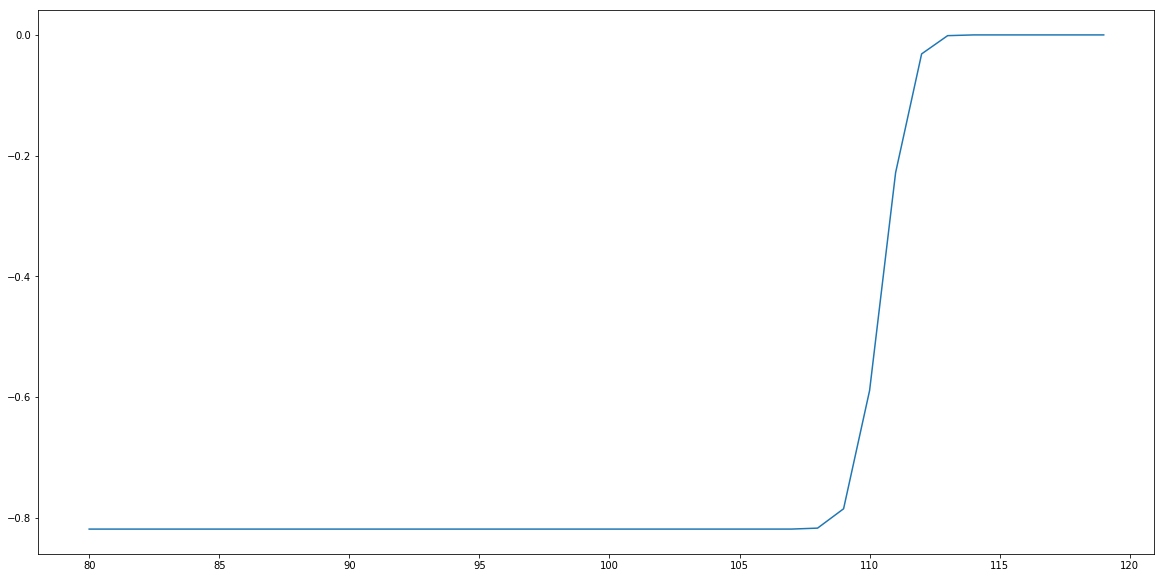

In [53]:
log = lambda x: None
S0 = 100
E = 100
steps = 500
r = 0.1
s = 0.2

xs = list(range(80, 120))
ys = []

for S0 in range(80, 120):
    args = Args(S0, E, steps, r, s)
    S = get_Ss(args)
    #print(list_to_str(S))
    V = get_Vs(S, args)
    #print(list_to_str(V))
    L = (V[1][1] - V[1][0]) / (S[1][1] - S[1][0])
    #print(S0, L)
    ys.append(L)

print(ys)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(xs, ys)
plt.show()

In [59]:
def get_Vs_amer(S, args):
    V = [[0] * (i + 1) for i in range(args.steps+1)]
    for j in range(args.steps):
        V[args.steps][j] = max(0.0, args.E - S[args.steps][j])

    for i in range(args.steps-1, -1, -1):
        for j in range(i+1):
            va = args.E - S[i][j]
            vv = np.e ** (-args.r * args.t) * (args.q * V[i+1][j+1] + (1.0 - args.q) * V[i+1][j])

            #print(va, vv)
            V[i][j] = max(va, vv)
    log(list_to_str(V))
    return V

1 9.335062268711155
2 9.153792115192857
3 8.972521961674602
4 8.79125180815629
5 8.609981654637949
6 8.428711501119707
7 8.24744134760138
8 8.066171194083068
9 7.884901040564785
10 7.703630887046472
11 7.522360733528231
12 7.341090580009919
13 7.1598204264916205
14 6.978550272973251
15 6.7972801194549675
16 6.616009965936712
17 6.434739812418442
18 6.25346965890013
19 6.07219950538186
20 5.890929351863505
21 5.709659198345207
22 5.52838904482698
23 5.347118891308654
24 5.165848737790327
25 4.9845785842720005
26 4.803308430753702
27 4.622038277235461
28 4.440768123717092
29 4.259497970198851
30 4.078227816680524
31 3.8969576631622687
32 3.7156875096439563
33 3.5344173561256937
34 3.3531472026073956
35 3.171877049089062
36 2.9906068955708065
37 2.809336742052473
38 2.628066588534203
39 2.4467964350158837
40 2.2655262814975927
41 2.0842561279793017
42 1.9029859744610036
43 1.7217158209426842
44 1.5404456674244287
45 1.3591755139061519
46 1.1779053603878538
47 0.996635206869513
48 0.815365

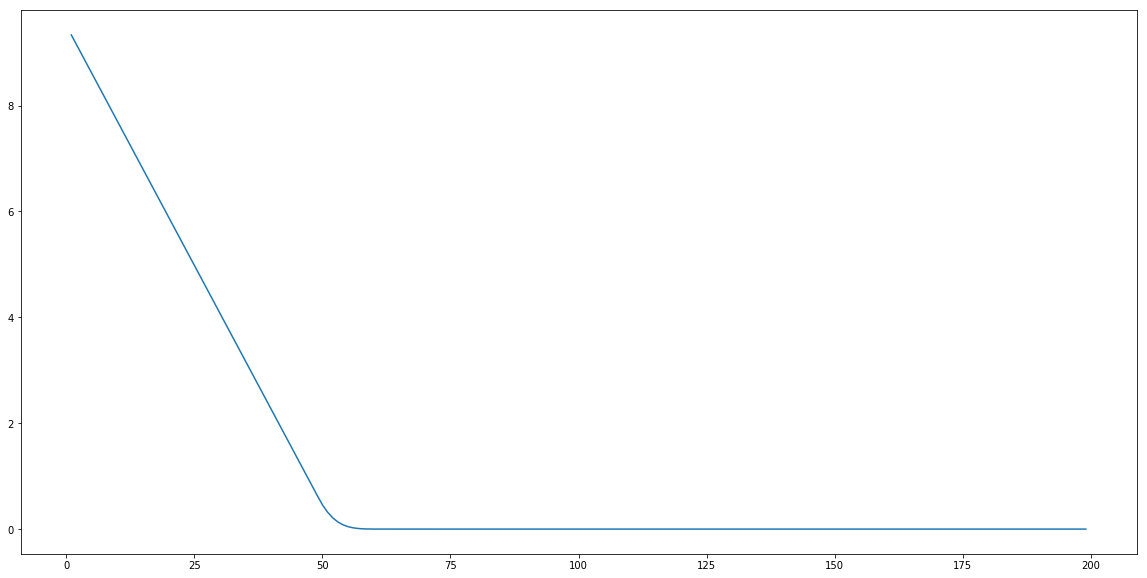

In [71]:
log = lambda x: None
S0 = 30
E = 100
steps = 10
r = 0.1
s = 0.2

xs = list(range(1, 200))
ys = []
for S0 in xs:
    args = Args(S0, E, steps, r, s)
    S = get_Ss(args)
    #print(list_to_str(S))
    Va = get_Vs_amer(S, args)
    Ve = get_Vs(S, args)
    ys.append(Va[0][0] - Ve[0][0])
    
for x, y in zip(xs, ys):
    print(x, y)
    
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(xs, ys)
plt.show()

In [75]:
log = lambda x: None
S0 = 30
E = 100
steps = 10
r = 0.1
s = 0.2

xs = list(range(80, 120))
ys = []
for S0 in xs:
    args = Args(S0, E, steps, r, s)
    S = get_Ss(args)
    #print(list_to_str(S))
    Va = get_Vs_amer(S, args)
    print(S0, Va[steps])
    

80 [34.50153975376148, 31.828496882703135, 29.046365062627444, 26.150692289069184, 23.13684486781419, 20.000000000000057, 16.73513806460899, 13.33703458600337, 9.800251873650012, 6.119130320655245, 0]
81 [33.682809000683505, 30.97635309373692, 28.159444625910282, 25.22757594268255, 22.17605542866187, 19.000000000000043, 15.694327290416595, 12.25374751832841, 8.672755022070618, 4.945619449663425, 0]
82 [32.864078247605505, 30.1242093047707, 27.27252418919312, 24.304459596295914, 21.215265989509547, 18.000000000000043, 14.653516516224215, 11.170460450653437, 7.545258170491238, 3.7721085786715918, 0]
83 [32.04534749452755, 29.272065515804485, 26.385603752475944, 23.38134324990925, 20.254476550357197, 17.000000000000014, 13.612705742031807, 10.087173382978477, 6.417761318911843, 2.5985977076797724, 0]
84 [31.226616741449547, 28.41992172683827, 25.498683315758782, 22.4582269035226, 19.29368711120486, 16.0, 12.571894967839398, 9.003886315303504, 5.290264467332463, 1.4250868366879672, 0]
85 [